# GANs Image Generation

In this notebook, we will explore how Generative Adversarial Networks (GANs) generate images. We will use a pretrained GAN model (BigGAN) to generate images from random noise.

## Instructions
1. Run the code below to generate an image from random noise.
2. Modify the latent vector to generate different images.
3. Experiment with generating different images by altering the latent vector and visualizing the results.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


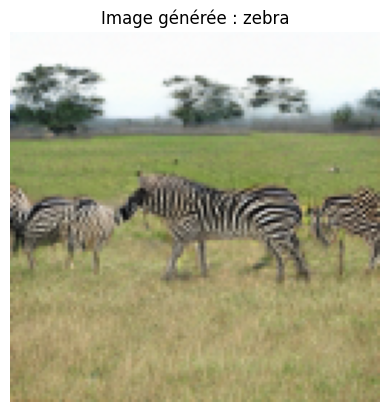

In [25]:
import torch
import nltk
nltk.download('wordnet')
from PIL import Image
import matplotlib.pyplot as plt
from pytorch_pretrained_biggan import BigGAN, one_hot_from_names, truncated_noise_sample

# Charger le modèle BigGAN préentraîné
model = BigGAN.from_pretrained('biggan-deep-128')
model.eval()

# Générer un vecteur de bruit latent
latent_vector = truncated_noise_sample(truncation=0.4, batch_size=1)
latent_vector = torch.from_numpy(latent_vector)

# Générer le vecteur de classe pour "zebra"
class_vector = one_hot_from_names(['zebra'], batch_size=1)
class_vector = torch.from_numpy(class_vector)

# Définir le niveau de "truncation"
truncation = 0.4

# Générer l'image
with torch.no_grad():
    output = model(latent_vector, class_vector, truncation)

# Post-traitement
output = (output + 1) / 2
output = output.squeeze().permute(1, 2, 0)
generated_image = (output.cpu().numpy() * 255).astype('uint8')

# Affichage dans Colab
plt.imshow(generated_image)
plt.axis('off')
plt.title("Image générée : zebra")
plt.show()

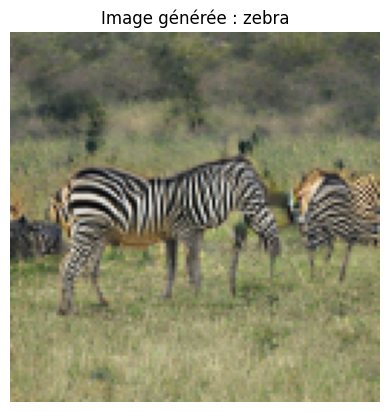

In [29]:
# Experiment with different latent vectors
from pytorch_pretrained_biggan import truncated_noise_sample

latent_vector = torch.from_numpy(truncated_noise_sample(truncation=0.2, batch_size=1))
#latent_vector = torch.from_numpy(truncated_noise_sample(truncation=0.4, batch_size=1))  # bruit compatible BigGAN
class_vector = torch.from_numpy(one_hot_from_names(['zebra'], batch_size=1))  # classe obligatoire
truncation = 0.4

with torch.no_grad():
    generated_image = model(latent_vector, class_vector, truncation)

generated_image = (generated_image + 1) / 2  # mise à l'échelle [0, 1]
generated_image = generated_image.squeeze().permute(1, 2, 0).cpu().numpy()  # (H, W, C)
generated_image = (generated_image * 255).astype('uint8')  # [0, 255] uint8
Image.fromarray(generated_image)

# Affichage dans Colab
plt.imshow(generated_image)
plt.axis('off')
plt.title("Image générée : zebra")
plt.show()


## Reflection

Now that you have generated images, write a brief report reflecting on your observations:

1. How did the generated images change when you modified the latent vector?
2. What patterns did you notice in the generated images? Were they realistic?
3. How does the process of generating images from noise differ from traditional image generation methods?
4. What challenges or limitations did you observe with the GAN model?